# Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pingouin as pg

In [2]:
# pour la regression logistique
import statsmodels.formula.api as smf

/Users/anapereira/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
import statsmodels.api as sm

In [4]:
# pour le modele lineaire
from sklearn import linear_model

In [5]:
# lib pour machine learning
from sklearn.model_selection import train_test_split

In [6]:
#importer le module metrics de la librairie scikit-learn (pour la courbe ROC)
import sklearn.metrics as metrics

# Importation des données

In [7]:
billets=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 10/billets.csv',sep = ';')

In [8]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [9]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [10]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Text(0.5, 1.0, 'Visualisation du nombre de faux et de vrais billets')

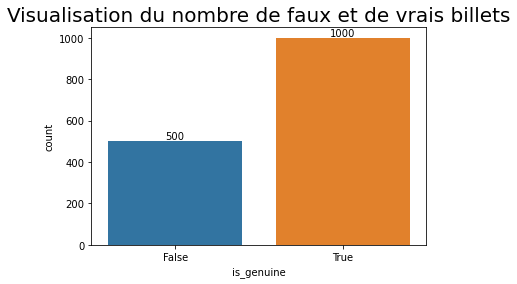

In [11]:
# visualisation des données : vrais et faux billets
ax = sns.countplot(x='is_genuine', data=billets)
ax.bar_label(ax.containers[0])
plt.title('Visualisation du nombre de faux et de vrais billets',fontsize=20)

Text(0.5, 1.0, 'Visualisation des valeurs manquantes sur le dataset')

<Figure size 864x576 with 0 Axes>

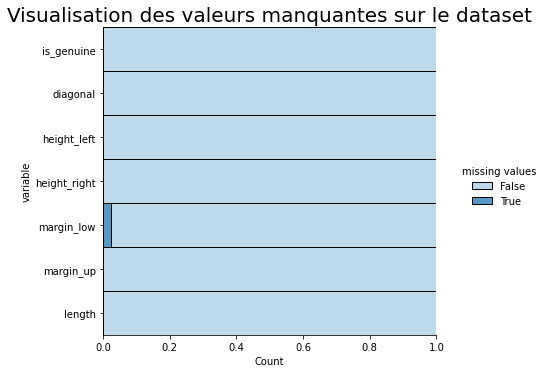

In [12]:
# 
plt.figure(figsize=(12,8))
sns.displot(
    data=billets.isna().melt(value_name="missing values"),
    y="variable",
    hue="missing values",
    multiple="fill",
    palette="Paired",
    aspect=1.25)
plt.title('Visualisation des valeurs manquantes sur le dataset',fontsize=20)

# Données manquantes

In [13]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [14]:
# pourcentage de données manquantes sur la variable margin_low
print('Pourcentage de données manquantes', 
      "{:.2f}".format(100.0 * billets['margin_low'].isna().sum() / billets.shape[0]),'%')

Pourcentage de données manquantes 2.47 %


In [15]:
# df avec données manquantes
billets_na=billets[billets['margin_low'].isna()]
billets_na

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [16]:
billets_na['is_genuine'].value_counts()

True     29
False     8
Name: is_genuine, dtype: int64

Text(0.5, 1.0, 'Visualisation du nombre de faux et de vrais billets pour les valeurs manquantes')

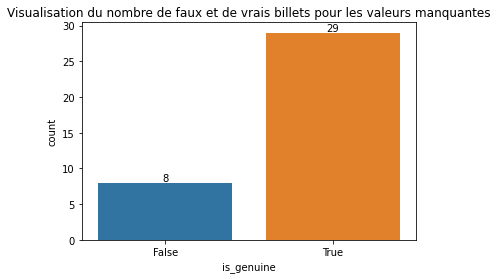

In [17]:
# visualisation des données
ax = sns.countplot(x='is_genuine', data=billets_na)
ax.bar_label(ax.containers[0])
plt.title('Visualisation du nombre de faux et de vrais billets pour les valeurs manquantes',fontsize=12)

In [18]:
# Création d'un df sans les lignes aux données manquantes
data=billets.drop(billets_na.index)
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


## Tests de corrélations

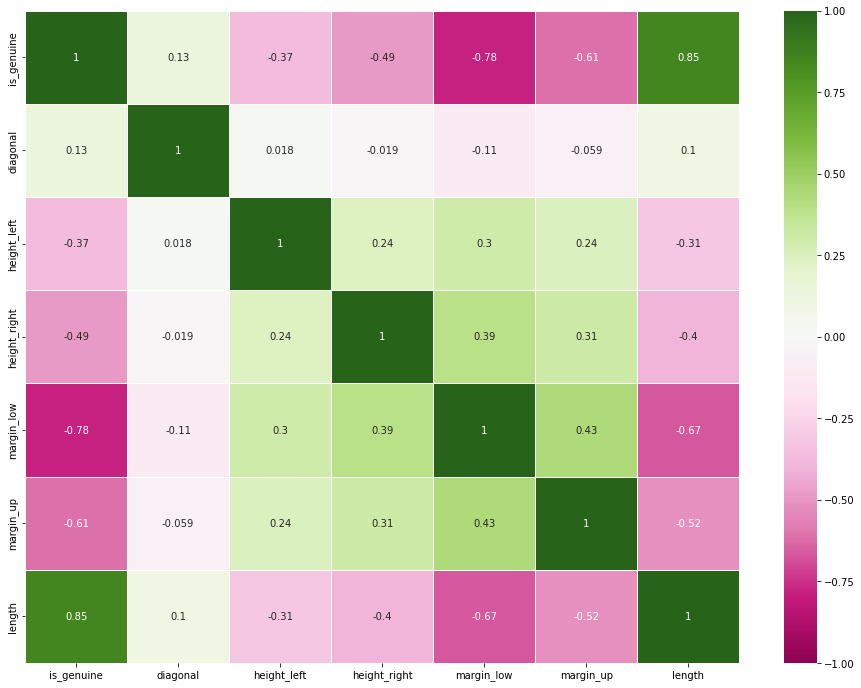

In [20]:
# Les variables sont-elles corrélées ? visualisation et mesure: Pearson
corr_df = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df,cmap="PiYG", annot=True,vmin=-1, vmax=1,linewidths=.5)
plt.show()

In [21]:
pg.corr(data['margin_low'],data['is_genuine'])

,n,r,CI95%,p-val,BF10,power
pearson,1463,-0.783032,"[-0.8, -0.76]",1.362034e-303,2.484e+299,1.0


In [22]:
pg.corr(data['margin_low'],data['diagonal'])

,n,r,CI95%,p-val,BF10,power
pearson,1463,-0.111534,"[-0.16, -0.06]",0.000019,302.876,0.989854


In [23]:
pg.corr(data['margin_low'],data['height_left'])

,n,r,CI95%,p-val,BF10,power
pearson,1463,0.302643,"[0.26, 0.35]",2.289195e-32,8.908e+28,1.0


In [24]:
pg.corr(data['margin_low'],data['height_right'])

,n,r,CI95%,p-val,BF10,power
pearson,1463,0.391085,"[0.35, 0.43]",1.159047e-54,1.274e+51,1.0


In [25]:
pg.corr(data['margin_low'],data['margin_up'])

,n,r,CI95%,p-val,BF10,power
pearson,1463,0.431606,"[0.39, 0.47]",1.921604e-67,6.692e+63,1.0


In [26]:
pg.corr(data['margin_low'],data['length'])

,n,r,CI95%,p-val,BF10,power
pearson,1463,-0.666753,"[-0.69, -0.64]",8.975567e-189,6.349e+184,1.0


## Régressions linéaires simples

In [27]:
diagonal_lm = pg.linear_regression(data['diagonal'], data['margin_low'])
diagonal_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,46.17,9.72,4.75,0.0,0.01,0.01,27.11,65.22
1,diagonal,-0.24,0.06,-4.29,0.0,0.01,0.01,-0.35,-0.13


In [28]:
height_left_lm = pg.linear_regression(data['height_left'], data['margin_low'])
height_left_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-65.27,5.75,-11.36,0.0,0.09,0.09,-76.55,-54.00
1,height_left,0.67,0.06,12.14,0.0,0.09,0.09,0.56,0.78


In [29]:
height_right_lm = pg.linear_regression(data['height_right'], data['margin_low'])
height_right_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-78.74,5.12,-15.37,0.0,0.15,0.15,-88.79,-68.68
1,height_right,0.80,0.05,16.24,0.0,0.15,0.15,0.70,0.90


In [30]:
is_genuine_lm = pg.linear_regression(data['is_genuine'], data['margin_low'])
is_genuine_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,5.22,0.02,280.12,0.0,0.61,0.61,5.18,5.25
1,is_genuine,-1.10,0.02,-48.12,0.0,0.61,0.61,-1.14,-1.06


In [31]:
margin_up_lm = pg.linear_regression(data['margin_up'], data['margin_low'])
margin_up_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.58,0.21,2.73,0.01,0.19,0.19,0.16,1.00
1,margin_up,1.24,0.07,18.29,0.00,0.19,0.19,1.11,1.37


In [32]:
length_lm = pg.linear_regression(data['length'], data['margin_low'])
length_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,61.60,1.67,36.88,0.0,0.44,0.44,58.32,64.87
1,length,-0.51,0.01,-34.20,0.0,0.44,0.44,-0.54,-0.48


In [33]:
reg_simp = smf.ols('margin_low ~ is_genuine', data=data).fit()
reg_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2316.
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.36e-303
Time:                        14:32:50   Log-Likelihood:                -781.24
No. Observations:                1463   AIC:                             1566.
Df Residuals:                    1461   BIC:                             1577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2159      0.019    280.120      0.000       5.179       5.252
is_genuine[T.True]    -1.0998      0.023    -48.120      0.000      -1.145      -1.055
==============================================================================
Omnibus:                       21.882   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.654
Skew:                           0.063   Prob(JB):                     6.66e-09
Kurtosis:                       3.776   Cond. No.                         3.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
reg_simp1 = smf.ols('margin_low ~ length', data=data).fit()
reg_simp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sat, 07 May 2022   Prob (F-statistic):          8.98e-189
Time:                        14:32:50   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.000      58.320      64.872
length        -0.5069      0.015    -34.196      0.000      -0.536      -0.478
==============================================================================
Omnibus:                       95.156   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.014
Skew:                           0.552   Prob(JB):                     1.31e-29
Kurtosis:                       3.980   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

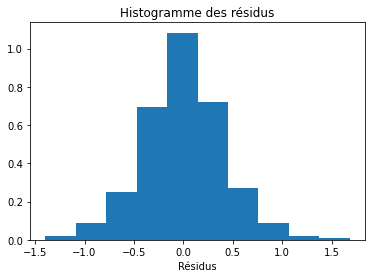

In [35]:
plt.hist(reg_simp.resid, density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

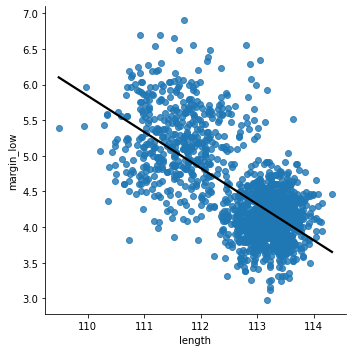

In [36]:
sns.lmplot(x="length", y="margin_low", data=data, ci=None, line_kws={'color':'black'})

## Régression linéaire multiple

### Choix du modèle

In [37]:
# Pour calcul, changement de True or False dans is_genuine par 1 et 0
data_int=data.copy()
data_int['is_genuine'] = data_int['is_genuine'].astype(int)
data_int

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [38]:
billet_lm = pg.linear_regression(data_int[['is_genuine','diagonal', 'height_left', 
                                           'height_right', 'margin_up','length']], data_int['margin_low'])
billet_lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.87,8.32,0.34,0.73,0.62,0.62,-13.45,19.18
1,is_genuine,-1.14,0.05,-23.03,0.00,0.62,0.62,-1.24,-1.04
2,diagonal,-0.01,0.04,-0.36,0.72,0.62,0.62,-0.08,0.06
3,height_left,0.03,0.04,0.73,0.47,0.62,0.62,-0.05,0.10
4,height_right,0.03,0.04,0.70,0.48,0.62,0.62,-0.05,0.10
5,margin_up,-0.21,0.06,-3.62,0.00,0.62,0.62,-0.33,-0.10
6,length,-0.00,0.02,-0.17,0.87,0.62,0.62,-0.05,0.04


In [39]:
# moins diagonal
billet_lm1 = pg.linear_regression(data_int[['is_genuine', 'height_left', 
                                           'height_right', 'margin_up','length']], data_int['margin_low'])
billet_lm1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.78,6.03,0.13,0.90,0.62,0.62,-11.04,12.60
1,is_genuine,-1.14,0.05,-23.24,0.00,0.62,0.62,-1.24,-1.05
2,height_left,0.03,0.04,0.70,0.48,0.62,0.62,-0.05,0.10
3,height_right,0.03,0.04,0.68,0.49,0.62,0.62,-0.05,0.10
4,margin_up,-0.21,0.06,-3.63,0.00,0.62,0.62,-0.33,-0.10
5,length,-0.00,0.02,-0.16,0.88,0.62,0.62,-0.05,0.04


In [40]:
# moins length
billet_lm2 = pg.linear_regression(data_int[['is_genuine', 'height_left', 
                                           'height_right', 'margin_up']], data_int['margin_low'])
billet_lm2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.39,5.48,0.07,0.94,0.62,0.62,-10.35,11.13
1,is_genuine,-1.15,0.03,-35.52,0.00,0.62,0.62,-1.21,-1.09
2,height_left,0.03,0.04,0.70,0.48,0.62,0.62,-0.05,0.10
3,height_right,0.03,0.04,0.68,0.50,0.62,0.62,-0.05,0.10
4,margin_up,-0.21,0.06,-3.63,0.00,0.62,0.62,-0.33,-0.10


In [41]:
# moins height right
billet_lm3 = pg.linear_regression(data_int[['is_genuine', 'height_left', 'margin_up']], data_int['margin_low'])
billet_lm3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.91,4.04,0.72,0.47,0.62,0.62,-5.00,10.83
1,is_genuine,-1.16,0.03,-38.48,0.00,0.62,0.62,-1.22,-1.10
2,height_left,0.03,0.04,0.75,0.45,0.62,0.62,-0.05,0.10
3,margin_up,-0.21,0.06,-3.63,0.00,0.62,0.62,-0.33,-0.10


In [42]:
# moins height left
billet_lm4 = pg.linear_regression(data_int[['is_genuine', 'margin_up']], data_int['margin_low'])
billet_lm4.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,5.93,0.20,30.00,0.0,0.62,0.62,5.54,6.31
1,is_genuine,-1.16,0.03,-40.48,0.0,0.62,0.62,-1.22,-1.11
2,margin_up,-0.21,0.06,-3.61,0.0,0.62,0.62,-0.33,-0.10


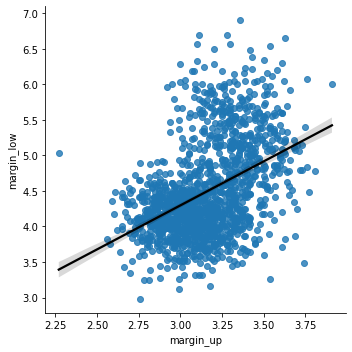

In [43]:
sns.lmplot(x="margin_up", y="margin_low", data=data_int, line_kws={'color':'black'})

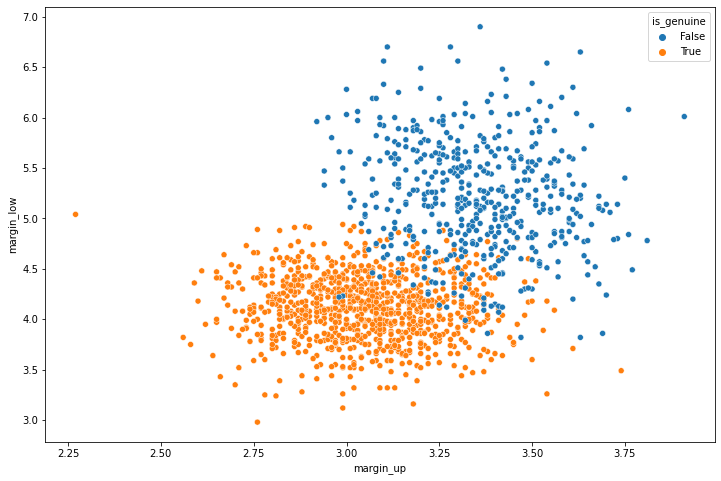

In [44]:
# On voit deux nuages distincts.
plt.figure(figsize=(12,8))
sns.scatterplot(x="margin_up", y="margin_low",hue='is_genuine', data=data)
plt.show()

### Vérification des conditions d'application de la régression linéaire multiple

In [45]:
# regression linaire multiple full modèle
reg_multi_full = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up + length'
                         , data=data_int).fit()

In [46]:
reg_multi_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sat, 07 May 2022   Prob (F-statistic):          4.75e-299
Time:                        14:32:54   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345      0.730     -13.445      19.179
is_genuine      -1.1406      0.050    -23.028      0.000      -1.238      -1.043
diagonal        -0.0130      0.036     -0.364      0.716      -0.083       0.057
height_left      0.0283      0.039      0.727      0.468      -0.048       0.105
height_right     0.0267      0.038      0.701      0.484      -0.048       0.102
margin_up       -0.2128      0.059     -3.621      0.000      -0.328      -0.098
length          -0.0039      0.023     -0.166      0.868      -0.050       0.042
==============================================================================
Omnibus:                       21.975   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.993
Skew:                           0.061   Prob(JB):                     5.62e-09
Kurtosis:                       3.780   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# regression linaire multiple avec les deux variables explicatives
reg_multi = smf.ols('margin_low ~ is_genuine + margin_up', data=data_int).fit()

In [48]:
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.24e-304
Time:                        14:32:54   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.000       5.539       6.314
is_genuine    -1.1632      0.029    -40.477      0.000      -1.220      -1.107
margin_up     -0.2119      0.059     -3.612      0.000      -0.327      -0.097
==============================================================================
Omnibus:                       22.365   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.106
Skew:                           0.057   Prob(JB):                     3.22e-09
Kurtosis:                       3.793   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# création d'une colonne avec les résidus
data_int_copy=data_int.copy()
data_int_copy['residus'] = reg_multi.resid

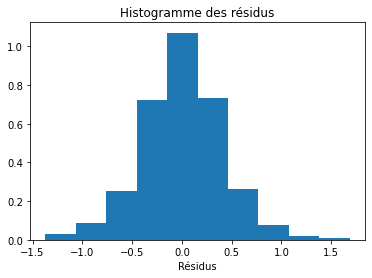

In [50]:
plt.hist(data_int_copy['residus'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

In [51]:
# test de normalité des résidus : shapiro
pg.normality(data_int_copy['residus'], method='normaltest')

,W,pval,normal
residus,22.365301,0.000014,False


In [52]:
# test de normalité des résidus : jarque_bera (mieux pour large dataset)
pg.normality(data_int_copy['residus'], method="jarque_bera")

,W,pval,normal
residus,39.105939,3.222948e-09,False


In [53]:
# la moyenne des résidus est égale à zero
data_int_copy['residus'].mean()

3.632850077570437e-15

In [54]:
# test de l’homoscédasticité (la constance de la variance) des résidus
pg.homoscedasticity(data_int)

,W,pval,equal_var
levene,353.805937,0.0,False


In [55]:
# Colinéarité des variables ? VIF (variance inflation factor) à lire en diag (doit être inférieure à 10)
df_cor = data_int.corr()
pd.DataFrame(np.linalg.inv(data_int.corr().values), index = df_cor.index, columns=df_cor.columns)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,6.446913,-0.249855,0.382240,0.627081,2.119550,1.109073,-3.091275
diagonal,-0.249855,1.028293,-0.078222,-0.057331,0.015633,-0.033670,0.053935
height_left,0.382240,-0.078222,1.174137,-0.076056,-0.033328,-0.027959,-0.015564
height_right,0.627081,-0.057331,-0.076056,1.321281,-0.034098,-0.018654,-0.049588
margin_low,2.119550,0.015633,-0.033328,-0.034098,2.610122,0.193715,0.013332
margin_up,1.109073,-0.033670,-0.027959,-0.018654,0.193715,1.610467,0.012541
length,-3.091275,0.053935,-0.015564,-0.049588,0.013332,0.012541,3.613323


In [56]:
# model selection criterion (AIC, Akaike's Information Criteria :
# permet de pénaliser les modèles en fonction du nombre de paramètres afin de satisfaire le critère de parcimonie
# On choisit alors le modèle avec le critère d'information d'Akaike le plus faible
if reg_multi_full.aic > reg_multi.aic:
    print("Model reg_multi prefered")
elif reg_multi_full.aic < reg_multi.aic:
    print("Model reg_multi_full preferred")
else:
    print("Both models equally good")
print('AIC reg_multi_full :', reg_multi_full.aic ,'et AIC reg_multi :', reg_multi.aic)

Model reg_multi prefered
AIC reg_multi_full : 1562.2721288868665 et AIC reg_multi : 1555.4562449949472


## Remplacement des données manquantes sur le df principal
Les résultats de la régression linéaire multiple avec les variables is_genuine et margin_up sont satisfaisants même si imparfaits mais ils n'y a que peu de données manquantes à combler.

In [57]:
# nouveau df
billets_na_int=billets_na.copy()
billets_na_int['is_genuine'] = billets_na_int['is_genuine'].astype(int)

In [58]:
missing_margin_low = pd.DataFrame({'is_genuine':billets_na_int['is_genuine'],
                                   'margin_up':billets_na_int['margin_up']})
missing_margin_low_prev = reg_multi.predict(missing_margin_low)
print(round(missing_margin_low_prev, 2))

72      4.07
99      4.10
151     4.12
197     4.00
241     4.12
251     4.14
284     4.08
334     4.13
410     4.10
413     4.09
445     4.13
481     4.19
505     4.13
611     4.06
654     4.19
675     4.22
710     4.11
739     4.11
742     4.08
780     4.10
798     4.13
844     4.13
845     4.15
871     4.11
895     4.13
919     4.22
945     4.12
946     4.07
981     4.13
1076    5.25
1121    5.25
1176    5.29
1303    5.31
1315    5.21
1347    5.16
1435    5.17
1438    5.24
dtype: float64


In [59]:
billets['margin_low']= billets['margin_low'].fillna(missing_margin_low_prev)
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [60]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [61]:
#### Test sur une valeur 
a_prevoir = pd.DataFrame({'is_genuine': 1, 'margin_up': 3.25}, index=[0])
unique_margin_low_prev = reg_multi.predict(a_prevoir)
print(round(unique_margin_low_prev[0], 2))

4.07


In [62]:
billets.loc[72,:]

is_genuine          True
diagonal          171.94
height_left       103.89
height_right      103.45
margin_low      4.074248
margin_up           3.25
length            112.79
Name: 72, dtype: object

# Analyses descriptives

<AxesSubplot:xlabel='is_genuine', ylabel='diagonal'>

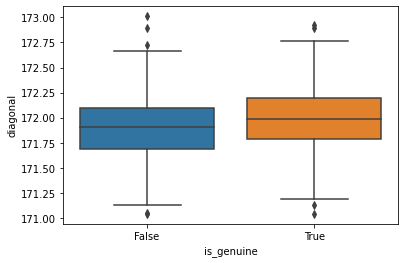

In [63]:
sns.boxplot(x='is_genuine',y='diagonal',data=billets)

<AxesSubplot:xlabel='is_genuine', ylabel='height_left'>

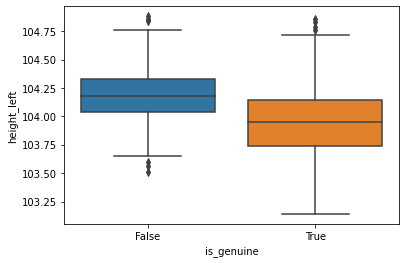

In [64]:
sns.boxplot(x='is_genuine',y='height_left',data=billets)

<AxesSubplot:xlabel='is_genuine', ylabel='height_right'>

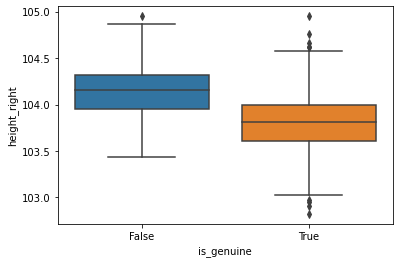

In [65]:
sns.boxplot(x='is_genuine',y='height_right',data=billets)

<AxesSubplot:xlabel='is_genuine', ylabel='margin_low'>

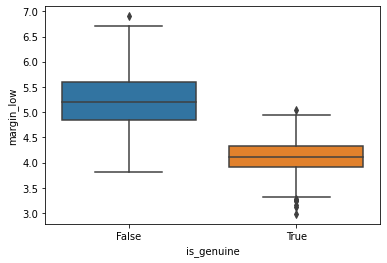

In [66]:
sns.boxplot(x='is_genuine',y="margin_low",data=billets)

<AxesSubplot:xlabel='is_genuine', ylabel='margin_up'>

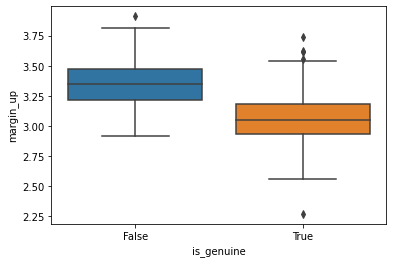

In [67]:
sns.boxplot(x='is_genuine',y="margin_up",data=billets)

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

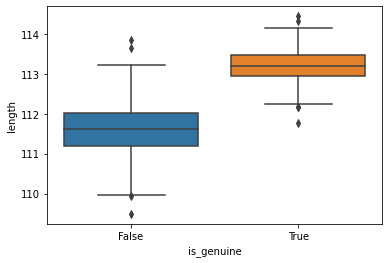

In [68]:
sns.boxplot(x='is_genuine',y="length",data=billets)

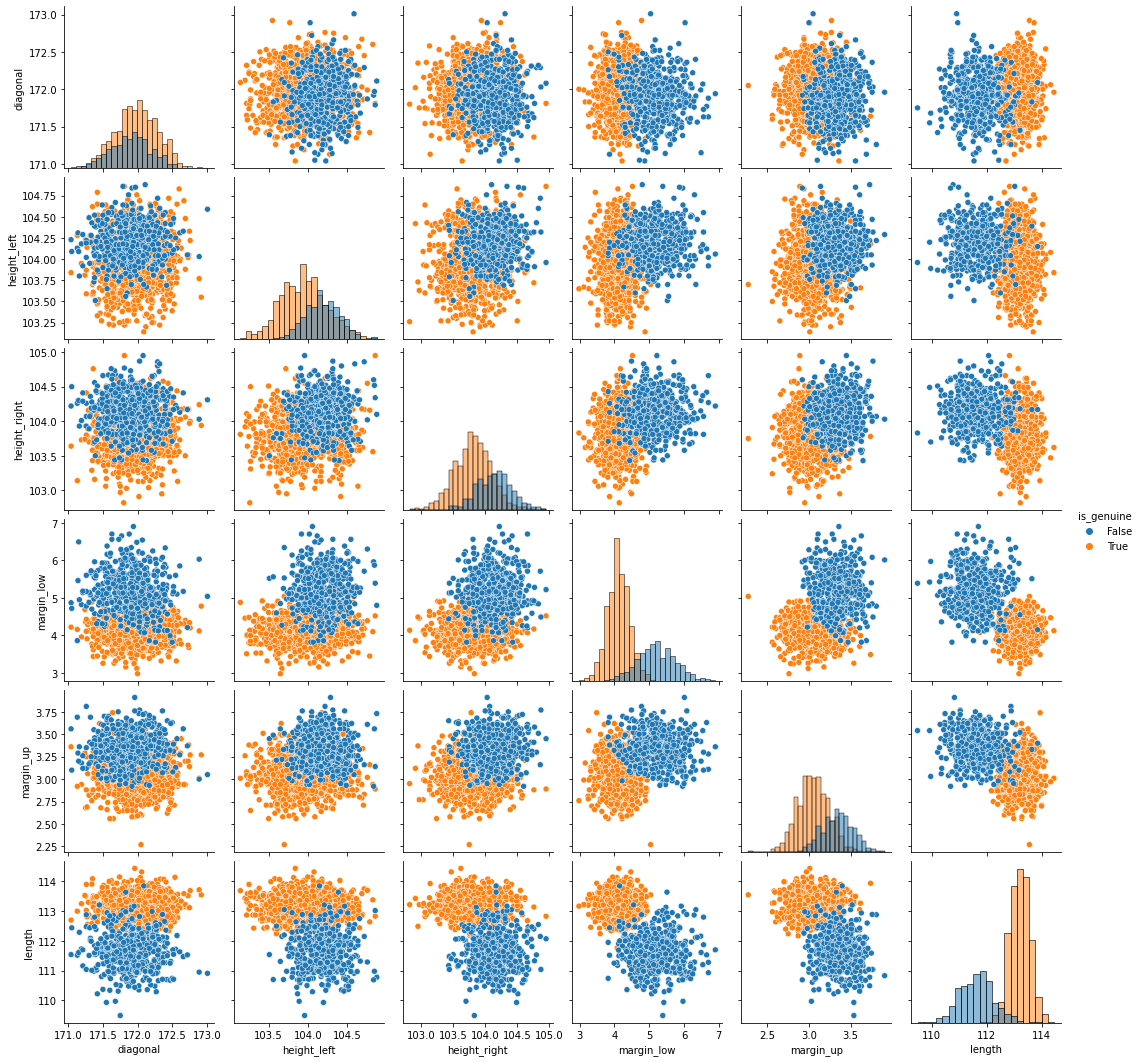

In [69]:
sns.pairplot(billets,hue='is_genuine', diag_kind='hist')

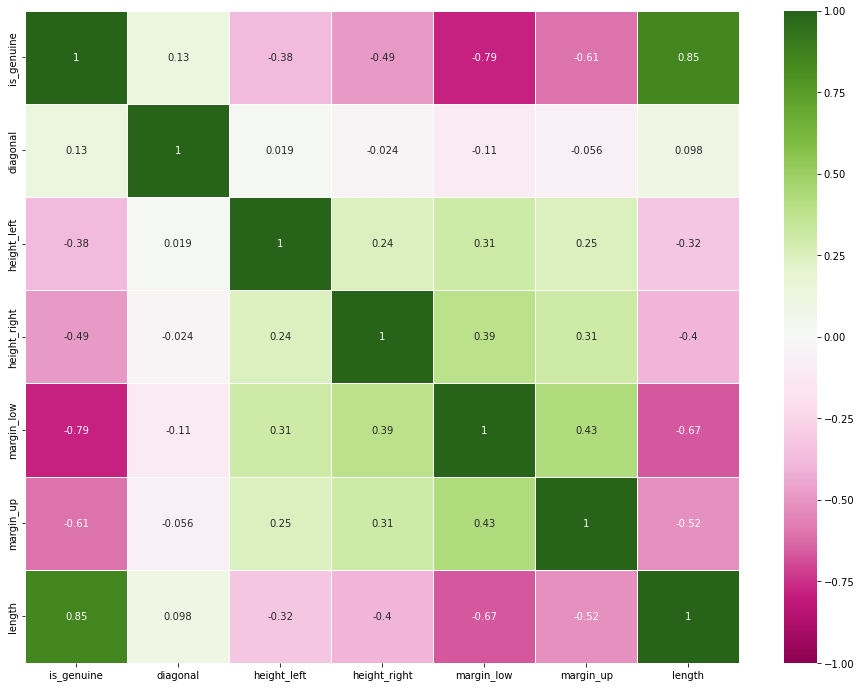

In [70]:
# Les variables sont-elles corrélées ? visualisation et mesure: Pearson
corr_df = billets.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df,cmap="PiYG", annot=True,vmin=-1, vmax=1,linewidths=.5)
plt.show()

# La régression logistique

## avec statsmodels

In [71]:
#set x (var explicatives) et y (var a expliquer)
LogR_X = billets.drop(columns='is_genuine')
LogR_y = billets['is_genuine']

In [72]:
#ajout colonne constante (pas de constante par defaut dans la librairie statsmodels)
LogR_X = sm.add_constant(LogR_X)

In [73]:
#fractionner dataset (pourcentage par défaut 75%train/25%test)
LogR_x_train, LogR_x_test, LogR_y_train, LogR_y_test = train_test_split(LogR_X, LogR_y, random_state = 0)

In [74]:
# modele et ajustement du modèle
model_LR_sm = sm.Logit(LogR_y_train, LogR_x_train)
result = model_LR_sm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.030933
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1118
Method:                           MLE   Df Model:                            6
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.9514
Time:                        14:33:12   Log-Likelihood:                -34.800
converged:                       True   LL-Null:                       -715.38
Covariance Type:            nonrobust   LLR p-value:                6.200e-291
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -110.2807    256.902     -0.429      0.668    -613.799     393.237
diagonal         0.2795      1.152      0.243      0.808      -1.979       2.538
height_left     -1.9319      1.283     -1.506      0.132      -4.447       0.583
height_right    -2.8999      1.236     -2.346      0.019      -5.323      -0.477
margin_low      -4.9816      0.966     -5.157      0.000      -6.875      -3.088
margin_up      -10.5941      2.319     -4.569      0.000     -15.138      -6.050
length           5.5241      0.901      6.132      0.000       3.759       7.290
================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [75]:
# suppression de la variable ayant la plus grande p value (diagonal) pour voir si le modele devient meilleur

LogR_X2 = LogR_X.drop(columns='diagonal')
#fractionner dataset (pourcentage par défaut 75%train/25%test)
LogR_x_train2, LogR_x_test2, LogR_y_train2, LogR_y_test2 = train_test_split(LogR_X2, LogR_y, random_state = 0)

In [76]:
# modele sans la variable diagonal
model_LR_sm2 = sm.Logit(LogR_y_train2, LogR_x_train2)
result2 = model_LR_sm2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.030959
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.9513
Time:                        14:33:12   Log-Likelihood:                -34.829
converged:                       True   LL-Null:                       -715.38
Covariance Type:            nonrobust   LLR p-value:                3.680e-292
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -63.6497    170.236     -0.374      0.708    -397.306     270.007
height_left     -1.9310      1.278     -1.510      0.131      -4.437       0.575
height_right    -2.9101      1.227     -2.372      0.018      -5.315      -0.505
margin_low      -5.0469      0.939     -5.377      0.000      -6.886      -3.207
margin_up      -10.6159      2.315     -4.585      0.000     -15.154      -6.078
length           5.5486      0.898      6.179      0.000       3.788       7.309
================================================================================

Possibly complete quasi-separation: A fraction 0.47 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [77]:
# suppression de la variable ayant la plus grande p value (height_left) pour voir si le modele devient meilleur

LogR_X3 = LogR_X2.drop(columns='height_left')
#fractionner dataset (pourcentage par défaut 75%train/25%test)
LogR_x_train3, LogR_x_test3, LogR_y_train3, LogR_y_test3 = train_test_split(LogR_X3, LogR_y, random_state = 0)

In [78]:
# modele sans la variable diagonal
model_LR_sm3 = sm.Logit(LogR_y_train3, LogR_x_train3)
result3 = model_LR_sm3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.032023
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.9496
Time:                        14:33:12   Log-Likelihood:                -36.025
converged:                       True   LL-Null:                       -715.38
Covariance Type:            nonrobust   LLR p-value:                6.186e-293
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -198.7842    151.009     -1.316      0.188    -494.757      97.188
height_right    -3.6057      1.207     -2.987      0.003      -5.972      -1.240
margin_low      -5.4344      0.942     -5.766      0.000      -7.282      -3.587
margin_up      -10.4940      2.261     -4.642      0.000     -14.925      -6.063
length           5.6181      0.888      6.328      0.000       3.878       7.358
================================================================================

Possibly complete quasi-separation: A fraction 0.47 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [79]:
# Comparaison des modeles avec l'AIC
if result.aic > result3.aic:
    print("Model result3 prefered")
elif result.aic < result3.aic:
    print("Model result preferred")
else:
    print("Both models equally good")
print(result.aic, result3.aic)

Model result3 prefered
83.59985248696111 82.05091290141753


In [80]:
# Comparaison des modeles avec l'AIC
if result2.aic > result3.aic:
    print("Model result3 prefered")
elif result2.aic < result3.aic:
    print("Model result2 preferred")
else:
    print("Both models equally good")
print(result2.aic, result3.aic)

Model result2 preferred
81.65871262041182 82.05091290141753


In [81]:
# Matrice de confusion pour le modele 2
result2.pred_table()


array([[368.,   6.],
       [  4., 747.]])

In [82]:
# Matrice de confusion pour le modele 3
result3.pred_table()

array([[368.,   6.],
       [  3., 748.]])

In [83]:
# Selon l'AIC, le modèle 2 est légèrement supérieur au modèle 3
# Cependant, au vu des pvalues et des résultats des matrices de confusion nous utiliserons le modèle 3
# (sans les variables diagonal et height_left) qui est lui aussi meilleur que le modèle complet

In [84]:
# Prediction de l'authenticité d'un billet (rappel : 0 False et 1 True) avec le modèle 2
m2predict=result2.predict(LogR_x_test2).round(0)
m2predict

471     1.0
9       1.0
1499    0.0
54      1.0
1411    0.0
       ... 
75      1.0
481     1.0
1350    0.0
748     1.0
1362    1.0
Length: 375, dtype: float64

In [85]:
cm2 = pd.crosstab(LogR_y_test2, m2predict)
cm2

col_0,0.0,1.0
is_genuine,,
False,124,2
True,0,249


In [86]:
# Prediction de l'authenticité d'un billet (rappel : 0 False et 1 True) avec le modèle 3
m3predict=result3.predict(LogR_x_test3).round(0)
m3predict

471     1.0
9       1.0
1499    0.0
54      1.0
1411    0.0
       ... 
75      1.0
481     1.0
1350    0.0
748     1.0
1362    0.0
Length: 375, dtype: float64

In [87]:
cm3 = pd.crosstab(LogR_y_test3, m3predict)
cm3

col_0,0.0,1.0
is_genuine,,
False,125,1
True,0,249


## avec sklearn

In [88]:
# #valeurs caractéristiques et valeur cible
x = billets.drop(columns='is_genuine')
y = billets['is_genuine']

In [89]:
#fractionner dataset (pourcentage par défaut 75%train/25%test)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [90]:
#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')

In [91]:
#training
modele_fit=modele_regLog.fit(x_train,y_train)

In [92]:
#précision du modèle
precision_reg = modele_fit.score(x_test,y_test)
print(precision_reg*100)

99.73333333333333


In [93]:
#prédiction sur un billet
prediction_billets = modele_fit.predict([[171.47,104.15,103.83,4.63,3.37,112.07]])
prediction_billets[0]

/Users/anapereira/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


False

In [94]:
# Prediction du modele
predProbaSm=modele_fit.predict(x_test)
predProbaSm

array([ True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [95]:
#colonnes pour les courbes ROC
#fpr (false positive rate -- taux de faux positifs) en abscisse
#tpr (true positive rate – taux de vrais positifs) en ordonnée
#pos_label = 1 pour indiquer la modalité cible
fprSm, tprSm, _ = metrics.roc_curve(y_test,predProbaSm,pos_label=1)

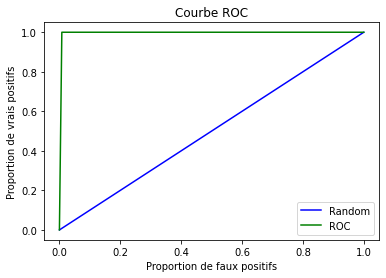

In [96]:
#graphique -- construire la diagonale de référence
#cas du modèle qui ne fait pas mieux que l’affectation des probabilités
#au hasard – notre courbe ne doit pas passer en dessous
#plus il s’en écarte vers le haut, mieux c’est

plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b',label = 'Random')
#rajouter notre diagramme
plt.plot(fprSm,tprSm,"g",label = 'ROC')
plt.xlabel('Proportion de faux positifs')
plt.ylabel('Proportion de vrais positifs')
plt.legend()
plt.title("Courbe ROC")
plt.show()

In [97]:
# Calcul de l'aire sous le ROC : valeur de l'AUC
aucSm = metrics.roc_auc_score(y_test,predProbaSm)
print("AUC : %.4f" % (aucSm))

AUC : 0.9960


In [98]:
#performance du modèle sur le jeu de test
metrics.accuracy_score(y_test, predProbaSm)

0.9973333333333333

In [99]:
# unbalanced data (more true than false billets)

from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_reg = balanced_accuracy_score(y_true=y_test, y_pred=predProbaSm)
print(balanced_accuracy_reg)

0.996031746031746


In [100]:
#matrice de confusion avec sklearn
print(metrics.confusion_matrix(y_test,predProbaSm))

[[125   1]
 [  0 249]]


In [101]:
cm = pd.crosstab(y_test, predProbaSm, rownames=['Observations'], colnames=['Predictions'])
cm

Predictions,False,True
Observations,,
False,125,1
True,0,249


In [102]:
#rapport sur la qualité de prédiction  faux negatif (f1) et attention au recall (faux positif) !!!!!!!
print(metrics.classification_report(y_test,predProbaSm))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00       126
        True       1.00      1.00      1.00       249

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



# Kmeans

In [103]:
# Importation librairie
from sklearn import preprocessing

In [104]:
#set x (var explicatives) et y (var a expliquer)
km_X = billets.copy()
km_X = km_X.drop(columns=['is_genuine'])
km_y = billets.is_genuine
km_X.shape

(1500, 6)

In [105]:
#fractionner dataset (pourcentage par défaut 75%train/25%test)
km_x_train, km_x_test, km_y_train, km_y_test = train_test_split(km_X, km_y, random_state = 0)

In [106]:
# Centrage et réduction
# variables auront μ = 0 et σ = 1
std_scaler = preprocessing.StandardScaler().fit(km_x_train)
X_scaled_train = std_scaler.transform(km_x_train)
X_scaled_test = std_scaler.transform(km_x_test)

In [107]:
#vérification de la standardisation
# moyenne de chaque colonne est égale à 0 et si l'écart type de chaque colonne est égale à 1
np.mean(X_scaled_train,axis=0)

array([ 2.07162682e-15, -2.20126140e-14,  4.61994887e-14, -3.64745271e-16,
       -1.52687739e-15, -6.90331742e-15])

In [108]:
#vérification de la standardisation
# moyenne de chaque colonne est égale à 0 et si l'écart type de chaque colonne est égale à 1
np.mean(X_scaled_test,axis=0)

array([ 0.07382951,  0.01208628,  0.04192503, -0.00605812,  0.04868263,
       -0.02660838])

In [109]:
np.std(X_scaled_train,axis=0)

array([1., 1., 1., 1., 1., 1.])

In [110]:
np.std(X_scaled_test,axis=0)

array([0.98535963, 1.08800356, 1.04428551, 0.98029183, 1.08093741,
       1.04939066])

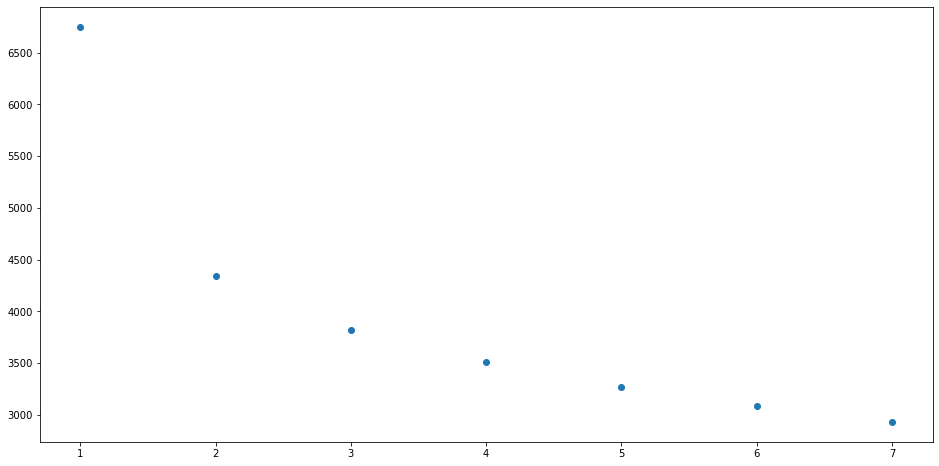

In [111]:
# Determiner le nombre de clusters
# Méthode du coude
# tracé de la courbe d'inertie pour déterminer le nombre de clusters
# la décroissance de l’inertie intra-classe pour déterminer la “meilleure” valeur de k. 
# nous cherchons alors à identifier les étapes où l’on observe une rupture dans la décroissance de cette courbe.
from sklearn import cluster
a=[]
for i in range(1,8):
    kmeans = cluster.KMeans(n_clusters=i) 
    kmeans.fit(X_scaled_train) 
    a.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.scatter(range(1,8),a)

In [112]:
# nette cassure à deux clusters (confirme partition vrai faux billets du dataset)

Populating the interactive namespace from numpy and matplotlib


/Users/anapereira/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


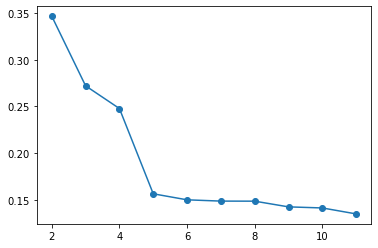

In [113]:
# Méthode du coefficient de silhouette KMeans
# calcul du coefficient de silhouette kmeans pour choisir le nombre de clusters le plus approprié

%pylab inline
from sklearn import metrics
silhouettes = []
for num_clusters in range (2,12):
    cls = cluster.KMeans(n_clusters=num_clusters,
                        n_init=1, init='random',random_state=2)
    cls.fit(X_scaled_train)
    silh=metrics.silhouette_score(X_scaled_train, cls.labels_)
    silhouettes.append(silh)
plt.plot(range(2,12),silhouettes, marker='o')

In [114]:
# Ici aussi on voit que le nombre de clusters le plus approprié est de deux

In [115]:
# résultats Kmeans
km_result=cluster.KMeans(n_clusters=2,random_state=4,max_iter=100)
km_result.fit(X_scaled_train)
km_result.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [116]:
#Check number of elements in each cluster
np.unique(km_result.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([372, 753]))

In [117]:
# Prediction du modele
prediction_km=km_result.predict(X_scaled_test)
prediction_km

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [118]:
#performance du modèle sur le jeu de test
metrics.accuracy_score(km_y_test, prediction_km)

0.9786666666666667

In [119]:
# unbalanced data (more true than false billets)

balanced_accuracy_km = balanced_accuracy_score(y_true=km_y_test, y_pred=prediction_km)
print(balanced_accuracy_km)

0.9760948556129279


In [120]:
# Calcul de l'aire sous le ROC : valeur de l'AUC
aucSm_km = metrics.roc_auc_score(km_y_test,prediction_km)
print("AUC : %.4f" % (aucSm_km))

AUC : 0.9761


In [121]:
# matrice de confusion
cm_km = pd.crosstab(km_y_test, prediction_km, rownames=['Observations'], colnames=['Predictions'])
cm_km

Predictions,0,1
Observations,,
False,122,4
True,4,245


In [122]:
#rapport sur la qualité de prédiction  faux negatif (f1) et attention au recall (faux positif) !!!!!!!
print(metrics.classification_report(km_y_test,prediction_km))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       126
        True       0.98      0.98      0.98       249

    accuracy                           0.98       375
   macro avg       0.98      0.98      0.98       375
weighted avg       0.98      0.98      0.98       375



# Predictions avec random forest

In [123]:
billets_rf=billets.copy()

In [124]:
#set x (var explicatives) et y (var a expliquer)
RF_X = billets_rf.drop(columns='is_genuine')
RF_y = billets_rf['is_genuine']

In [125]:
#fractionner dataset (pourcentage par défaut 75%train/25%test)
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(x, y, random_state = 0)

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(rf_x_train, rf_y_train)
RF_y2 = rf.predict(rf_x_test)

In [127]:
RF_y2

array([ True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [128]:
#performance du modèle sur le jeu de test
metrics.accuracy_score(rf_y_test, RF_y2)

0.992

In [129]:
# unbalanced data (more true than false billets)

balanced_accuracy_rf = balanced_accuracy_score(y_true=rf_y_test, y_pred=RF_y2)
print(balanced_accuracy_rf)

0.9920156817747179


In [130]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=2))
classifier.fit(rf_x_train, rf_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=2))])

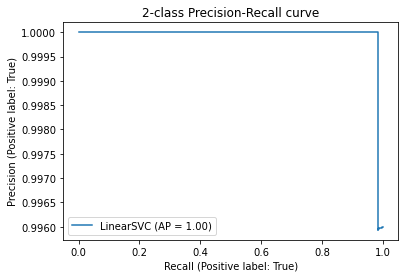

In [131]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, rf_x_test, rf_y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [132]:
# matrice de confusion random forest
cm_random_forest = pd.crosstab(rf_y_test, RF_y2, rownames=['Observations'], colnames=['Predictions'])
cm_random_forest

Predictions,False,True
Observations,,
False,125,1
True,2,247


In [133]:
#rapport sur la qualité de prédiction  faux negatif (f1) et attention au recall (faux positif) !!!!!!!
print(metrics.classification_report(rf_y_test,RF_y2))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       126
        True       1.00      0.99      0.99       249

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



In [134]:
# Calcul de l'aire sous le ROC : valeur de l'AUC
aucSm_rf = metrics.roc_auc_score(rf_y_test,RF_y2)
print("AUC : %.4f" % (aucSm_rf))

AUC : 0.9920


# Test des modèles sur le fichier autre

## avec reg logistique sklearn

In [135]:
billets_prod=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 10/billets_production.csv')
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [136]:
billets_prod.set_index(['id'],inplace = True)

In [137]:
billets_prod['prediction']=modele_fit.predict(billets_prod)
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


## avec la méthode kmeans

In [138]:
billets_prod_km=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 10/billets_production.csv')

In [139]:
billets_prod_km.set_index(['id'],inplace = True)

In [140]:
X_scaled_test_prod = std_scaler.transform(billets_prod_km)

In [141]:
# Prediction du modele
billets_prod_km['prediction_km']=km_result.predict(X_scaled_test_prod)
billets_prod_km['prediction_km']=billets_prod_km['prediction_km'].astype(bool)
billets_prod_km

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction_km
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


## Avec l'algorithme Random Forest

In [142]:
billets_prod_rf=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 10/billets_production.csv')

In [143]:
billets_prod_rf.set_index(['id'],inplace = True)

In [144]:
billets_prod_rf['prediction']=rf.predict(billets_prod_rf)
billets_prod_rf

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


# Le meilleure modèle